In [172]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset


#First, it is needed to set the index which ics the Mouse ID
mouse_drug_data_indexed = mouse_drug_data.set_index("Mouse ID")
clinical_trial_data_indexed=clinical_trial_data.set_index("Mouse ID")

#Merge both dataframes

result = pd.merge(clinical_trial_data,mouse_drug_data, how='left', on='Mouse ID')

# Display the data table for preview
print(result)




     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        f932          0           45.000000                 0   Ketapril
2        g107          0           45.000000                 0   Ketapril
3        a457          0           45.000000                 0   Ketapril
4        c819          0           45.000000                 0   Ketapril
...       ...        ...                 ...               ...        ...
1901     r944         45           41.581521                 2  Capomulin
1902     u364         45           31.023923                 3  Capomulin
1903     p438         45           61.433892                 1   Ceftamin
1904     x773         45           58.634971                 4    Placebo
1905     b879         45           72.555239                 2   Stelasyn

[1906 rows x 5 columns]


## Tumor Response to Treatment

In [180]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
result_grouped_mean=pd.DataFrame(result.groupby(['Drug','Timepoint']).mean())

#Reset index in order to create
result_grouped_mean.reset_index(inplace=True)

#Select 3 columns
tumor_changes_mean=result_grouped_mean[['Drug','Timepoint','Tumor Volume (mm3)']]

#Set index
tumor_changes_mean_indexed=tumor_changes_mean.set_index("Drug")

#Print
tumor_changes_mean_indexed


,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,45.000000
Capomulin,5,44.266086
Capomulin,10,43.084291
Capomulin,15,42.064317
Capomulin,20,40.716325
...,...,...
Zoniferol,25,55.432935
Zoniferol,30,57.713531
Zoniferol,35,60.089372


In [154]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint and calculate standard error
result_grouped_se=pd.DataFrame((result.groupby(['Drug','Timepoint']).sem(ddof=1)))

                         
#Reset index in order to create
result_grouped_se.reset_index(inplace=True)

#Select 3 columns
tumor_changes_se=result_grouped_se[['Drug','Timepoint','Tumor Volume (mm3)']]

#Set index
tumor_changes_se_indexed=tumor_changes_se.set_index("Drug")

#Print
tumor_changes_se_indexed


,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.448593
Capomulin,10,0.702684
Capomulin,15,0.838617
Capomulin,20,0.909731
...,...,...
Zoniferol,25,0.602513
Zoniferol,30,0.800043
Zoniferol,35,0.881426


In [155]:
# Minor Data Munging to Re-Format the Data Frames
tumor_changes_pivot=tumor_changes_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
tumor_changes_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [171]:
tumor_changes_mean_indexed.head(5)

,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,45.000000
Capomulin,5,44.266086
Capomulin,10,43.084291
Capomulin,15,42.064317
Capomulin,20,40.716325


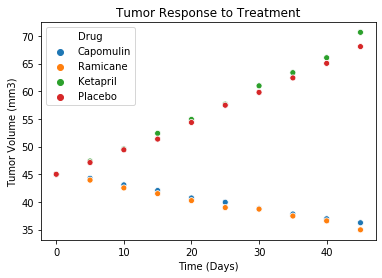

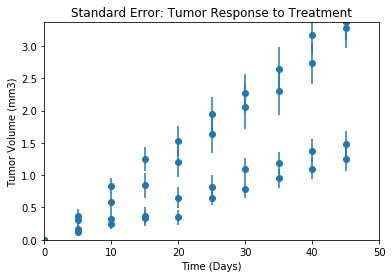

In [388]:
# Generate the Plot (with Error Bars)

#Select 3 observations and reset index
tumor_changes_scatter=pd.DataFrame(tumor_changes_mean_indexed.loc[["Capomulin","Ramicane","Ketapril","Placebo"]])
tcsu=tumor_changes_scatter.reset_index()


#Scatter plot
sns.scatterplot(x='Timepoint',y='Tumor Volume (mm3)',hue='Drug',data=tcsu)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("Tumor Response to Treatment.png")

#Standard error
fig, ax = plt.subplots()
ax.errorbar(metastatic_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]]
            ,metastatic_mean_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
            metastatic_se_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]], fmt="o")
plt.ylim(metastatic_mean['Metastatic Sites'].min(), metastatic_mean['Metastatic Sites'].max())
plt.xlim(metastatic_mean['Timepoint'].min(), metastatic_mean['Timepoint'].max()+5)

plt.title("Standard Error: Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("Standard Error Tumor Response to Treatment.png")

plt.show()






![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [193]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
result_grouped_mean=pd.DataFrame(result.groupby(['Drug','Timepoint']).mean())

# Convert to DataFrame
result_grouped_mean.reset_index(inplace=True)

# Preview DataFrame
metastatic_mean=result_grouped_mean[['Drug','Timepoint','Metastatic Sites']]

#Set index
metastatic_mean_indexed=metastatic_mean.set_index("Drug")

#Print
metastatic_mean_indexed


,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.160000
Capomulin,10,0.320000
Capomulin,15,0.375000
Capomulin,20,0.652174
...,...,...
Zoniferol,25,1.687500
Zoniferol,30,1.933333
Zoniferol,35,2.285714


In [194]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint and caslculate the standard error
result_grouped_se=pd.DataFrame((result.groupby(['Drug','Timepoint']).sem(ddof=1)))

# Convert to DataFrame

#Reset index in order to create
result_grouped_se.reset_index(inplace=True)

# Preview DataFrame  

#Select 3 columns
metastatic_se=result_grouped_se[['Drug','Timepoint','Metastatic Sites']]

#Set index
metastatic_se_indexed=metastatic_se.set_index("Drug")

#Print
metastatic_se_indexed

,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
Capomulin,5,0.074833
Capomulin,10,0.125433
Capomulin,15,0.132048
Capomulin,20,0.161621
...,...,...
Zoniferol,25,0.236621
Zoniferol,30,0.248168
Zoniferol,35,0.285714


In [195]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot=metastatic_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


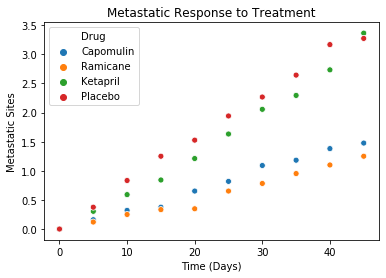

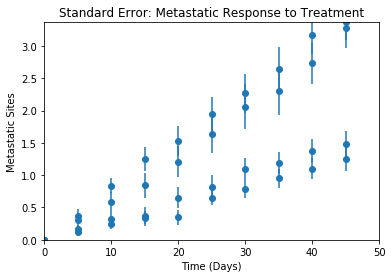

In [389]:
# Generate the Plot (with Error Bars)

#Select 3 observations and reset index
metastatic_scatter=pd.DataFrame(metastatic_mean_indexed.loc[["Capomulin","Ramicane","Ketapril","Placebo"]])
ms=metastatic_scatter.reset_index()

#Scatter plot
sns.scatterplot(x='Timepoint',y='Metastatic Sites',hue='Drug',data=ms)

plt.title("Metastatic Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

plt.savefig("Metastatic Response to Treatment.png")

#Standar error
fig, ax = plt.subplots()
ax.errorbar(metastatic_mean_indexed['Timepoint'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]]
            ,metastatic_mean_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]],
            metastatic_se_indexed['Metastatic Sites'].loc[["Capomulin","Ramicane","Ketapril","Placebo"]], fmt="o")
plt.ylim(metastatic_mean['Metastatic Sites'].min(), metastatic_mean['Metastatic Sites'].max())
plt.xlim(metastatic_mean['Timepoint'].min(), metastatic_mean['Timepoint'].max()+5)

plt.title("Standard Error: Metastatic Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

plt.savefig("Standard Error Metastatic Response to Treatment.png")

plt.show()

# Save the Figure



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [227]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
result_grouped_count=pd.DataFrame(result.groupby(['Drug','Timepoint']).count())

# Convert to DataFrame

#Reset index in order to create
result_grouped_count.reset_index(inplace=True)

# Preview DataFrame

#Select 3 columns
survival_count=result_grouped_count[['Drug','Timepoint','Tumor Volume (mm3)']]

#Set index
survival_count_indexed=survival_count.set_index("Drug")

#Print
survival_count_indexed

,Timepoint,Tumor Volume (mm3)
Drug,,
Capomulin,0,25
Capomulin,5,25
Capomulin,10,25
Capomulin,15,24
Capomulin,20,23
...,...,...
Zoniferol,25,16
Zoniferol,30,15
Zoniferol,35,14


In [326]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot_count=survival_count.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#Axis inverted for further calculations
survival_pivot_count_two=pd.DataFrame(survival_count.pivot(index='Drug', columns='Timepoint', values='Tumor Volume (mm3)'))

# Preview the Data Frame
survival_pivot_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [473]:
#Survival rate

survivor_percentage=[]
time=[]

for i,row in enumerate (survival_pivot_count.values):
    index_value=survival_pivot_count.index[i]
    time.append(index_value)
    calculate=(row/survival_pivot_count.iloc[0,:])*100
    survivor_percentage.append(calculate)    

#Create dataframe and reset index
survivor_percentage_df=pd.DataFrame(survivor_percentage).reset_index()

#Add column Timepoint
survivor_percentage_df['Timepoint']=time

#Set Timepoint as index
survivor_index=survivor_percentage_df.set_index("Timepoint")

#Stacked pivot table, create dataframe and reset index
stacked=survivor_index.stack()
stacked_df=pd.DataFrame(stacked)
stacked_df_reset=stacked_df.reset_index()
stacked_df_index=stacked_df_reset.set_index("Drug")

#Print
stacked_df_index

,Timepoint,0
Drug,,
index,0,0.000000
Capomulin,0,100.000000
Ceftamin,0,100.000000
Infubinol,0,100.000000
Ketapril,0,100.000000
...,...,...
Placebo,45,44.000000
Propriva,45,26.923077
Ramicane,45,80.000000


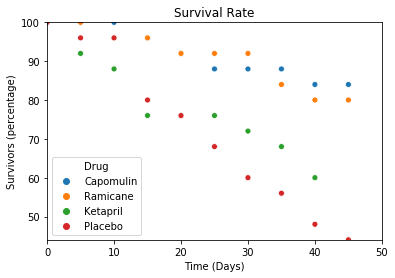

In [480]:
# Generate the Plot (Accounting for percentages)

#Select 3 observations and reset index
survival_percentage=pd.DataFrame(stacked_df_index.loc[["Capomulin","Ramicane","Ketapril","Placebo"]])
spdf=survival_percentage.reset_index()

#Scatter plot
sns.scatterplot(x='Timepoint',y=0,hue='Drug',data=spdf)

plt.title("Survival Rate")
plt.xlabel("Time (Days)")
plt.ylabel("Survivors (percentage)")

plt.ylim(spdf[0].min(), spdf[0].max())
plt.xlim(spdf['Timepoint'].min(), spdf['Timepoint'].max()+5)

# Save the Figure
plt.savefig("Survival Rate-percentage.png")

plt.show()





![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [486]:
#New pivot table
tumor_changes_pivot_two=pd.DataFrame(tumor_changes_mean.pivot(index='Drug', columns='Timepoint', values='Tumor Volume (mm3)'))

# Calculate the percent changes for each drug
drug=pd.DataFrame(tumor_changes_pivot_two.iloc[:,[0,-1]])
drug_final=pd.DataFrame((drug.iloc[:,1]-(drug.iloc[:,0]))/drug.iloc[:,0]*100)

#Print
drug_final

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


-19.475302667894173
-22.320900462766673
57.028794686606076
51.29796048315153


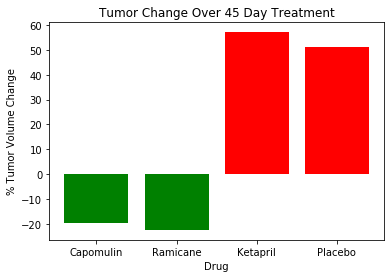

In [556]:
# Store all Relevant Percent Changes into a Tuple
sorted_drug= drug_final.sort_values([0],ascending=False)

subset=pd.DataFrame(drug_final.loc[["Capomulin","Ramicane","Ketapril","Placebo"]])
subset_no_index=subset.reset_index()
subset_rename = subset_no_index.rename(columns={0:"Percentage"})


#tuples=list(subset_rename.itertuples(index=False, name=None))
#tuples

classification=[]

for i,row in enumerate (subset_rename.values):
    variable=subset_rename.iloc[i,1]
    print(variable)
    index_value=subset_rename.index[i]
    if variable>0:
        classification.append('passing')
    elif variable<=0:
        classification.append('failing')

#Add column Classification
subset_rename['Classification']=classification

#Adjust size of plot 
#plt.figure(figsize=(15,15))

#Create plot
plt.bar(subset_rename['Drug'], subset_rename["Percentage"],color=np.where(subset_rename["Percentage"]<0,'g','r'),
                      alpha=1, align="center")

# Orient widths. Add labels, tick marks, etc. 

# Set the xlabel and ylabel using class methods
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)